#   Demand Forecasting and Inventory Management of Medicines in a Healthcare Centre
Efficient inventory management and accurate demand forecasting are 
crucial in healthcare centers to ensure timely availability of medicine and 
improve patient care.


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_excel('C:\\Users\\GHAGHRE\\Desktop\\healthcare_data.xlsx')

In [3]:
df.isna().sum()

ROLL NO.              0
DATE                  0
GENDER                0
AGE                   0
DIGNOSIS              0
MEDICINE_1         4252
QUANTITY_1            0
MEDICINE_2         4252
QUANTITY_2            0
MEDICINE_3        17008
QUANTITY_3            0
MEDICINE_ 4       29764
QUANTITY_ 4           0
TOTAL_QUANTITY        0
dtype: int64

In [4]:
df.describe()

,ROLL NO.,AGE,QUANTITY_1,QUANTITY_2,QUANTITY_3,QUANTITY_ 4,TOTAL_QUANTITY
count,42520.00000,42520.000000,42520.000000,42520.000000,42520.000000,42520.000000,42520.000000
mean,21260.50000,22.489581,4.100000,3.300000,2.000000,0.600000,10.000000
std,12274.61106,2.876919,3.360099,2.410423,1.897389,1.200014,6.418798
min,1.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10630.75000,20.000000,1.000000,2.000000,0.000000,0.000000,5.000000
50%,21260.50000,22.000000,3.000000,3.000000,2.500000,0.000000,8.500000
75%,31890.25000,25.000000,9.000000,3.000000,3.000000,0.000000,16.000000
max,42520.00000,27.000000,9.000000,9.000000,6.000000,3.000000,21.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42520 entries, 0 to 42519
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROLL NO.        42520 non-null  int64         
 1   DATE            42520 non-null  datetime64[ns]
 2   GENDER          42520 non-null  object        
 3   AGE             42520 non-null  int64         
 4   DIGNOSIS        42520 non-null  object        
 5   MEDICINE_1      38268 non-null  object        
 6   QUANTITY_1      42520 non-null  int64         
 7   MEDICINE_2      38268 non-null  object        
 8   QUANTITY_2      42520 non-null  int64         
 9   MEDICINE_3      25512 non-null  object        
 10  QUANTITY_3      42520 non-null  int64         
 11  MEDICINE_ 4     12756 non-null  object        
 12  QUANTITY_ 4     42520 non-null  int64         
 13  TOTAL_QUANTITY  42520 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage

In [6]:
df.shape

(42520, 14)

In [7]:
df.nunique()

ROLL NO.          42520
DATE               1127
GENDER                2
AGE                  10
DIGNOSIS             10
MEDICINE_1            9
QUANTITY_1            4
MEDICINE_2            7
QUANTITY_2            6
MEDICINE_3            4
QUANTITY_3            4
MEDICINE_ 4           3
QUANTITY_ 4           2
TOTAL_QUANTITY       10
dtype: int64

In [8]:
df = df.drop(['ROLL NO.'], axis = 1)

In [9]:
df.columns = [col.lower().replace(' ', '') for col in df.columns]

In [10]:
df.columns

Index(['date', 'gender', 'age', 'dignosis', 'medicine_1', 'quantity_1',
       'medicine_2', 'quantity_2', 'medicine_3', 'quantity_3', 'medicine_4',
       'quantity_4', 'total_quantity'],
      dtype='object')

In [11]:
df.gender.value_counts()

F    21289
M    21231
Name: gender, dtype: int64

In [12]:
df.date.min(), df.date.max()

(Timestamp('2021-08-01 00:00:00'), Timestamp('2024-08-31 00:00:00'))

In [13]:
df.dignosis.unique()

array(['COLD', 'URTI', 'SKIN_INFECTION', 'ABDOMINAL_PAIN', 'LEG_PAIN',
       'ROUTINE_CHEKUP', 'LOOSE_MOTION', 'ACIDITY', 'VIRAL FEVER',
       'COUGH'], dtype=object)

In [14]:
df.medicine_1.unique()

array(['Mox 500', 'Dolo 650', 'CANDID_CREAM', 'CIFIXIM', 'Zerodol', nan,
       'ENUFF', 'Pantop_40', 'Paracetamol', 'Ascoryl_Syrup'], dtype=object)

In [15]:
df.medicine_2.unique()

array(['PARACETOMOL', 'ASCORYL_SYRUP', 'LEVOCET', 'PANTOP_40', nan, 'ORS',
       'AZEE', 'DOLO_650'], dtype=object)

In [16]:
df.medicine_3.unique()

array(['LEVOCET', nan, 'DICLOFENAC', 'ORS', 'MOX_500'], dtype=object)

In [17]:
df.medicine_4.unique()

array([nan, 'AZEE', 'PANTOP_40', '0'], dtype=object)

In [18]:
df['medicine_1'] = df['medicine_1'].fillna('')
df['medicine_2'] = df['medicine_2'].fillna('')
df['medicine_3'] = df['medicine_3'].fillna('')
df['medicine_4'] = df['medicine_4'].fillna('')

In [19]:
df['medicine_1'] = df['medicine_1'].str.strip()
df['medicine_2'] = df['medicine_2'].str.strip()
df['medicine_3'] = df['medicine_3'].str.strip()
df['medicine_4'] = df['medicine_4'].str.strip()

df['medicine_1'] = df['medicine_1'].apply(lambda x : x.replace(' ', '_'))
df['medicine_2'] = df['medicine_2'].apply(lambda x : x.replace(' ', '_'))
df['medicine_3'] = df['medicine_3'].apply(lambda x : x.replace(' ', '_'))
df['medicine_4'] = df['medicine_4'].apply(lambda x : x.replace(' ', '_'))

In [20]:
df.medicine_1.unique()

array(['Mox_500', 'Dolo_650', 'CANDID_CREAM', 'CIFIXIM', 'Zerodol', '',
       'ENUFF', 'Pantop_40', 'Paracetamol', 'Ascoryl_Syrup'], dtype=object)

In [21]:
df.medicine_2.unique()

array(['PARACETOMOL', 'ASCORYL_SYRUP', 'LEVOCET', 'PANTOP_40', '', 'ORS',
       'AZEE', 'DOLO_650'], dtype=object)

In [22]:
df.medicine_3.unique()

array(['LEVOCET', '', 'DICLOFENAC', 'ORS', 'MOX_500'], dtype=object)

In [23]:
df.medicine_4.unique()

array(['', 'AZEE', 'PANTOP_40', '0'], dtype=object)

In [24]:
df['medicine_4'][df['medicine_4'] == '0'] = ''

In [25]:
df['medicine_4'].unique()

array(['', 'AZEE', 'PANTOP_40'], dtype=object)

In [26]:
df[df['medicine_1'] == df['medicine_2']]['medicine_1'].unique()

array([''], dtype=object)

In [27]:
df[df['medicine_1'] == df['medicine_3']]['medicine_1'].unique()

array([''], dtype=object)

In [28]:
df[df['medicine_1'] == df['medicine_4']]['medicine_1'].unique()

array([''], dtype=object)

In [29]:
df[df['medicine_2'] == df['medicine_3']]['medicine_2'].unique()

array([''], dtype=object)

In [30]:
df[df['medicine_2'] == df['medicine_4']]['medicine_2'].unique()

array([''], dtype=object)

In [31]:
df[df['medicine_3'] == df['medicine_4']]['medicine_3'].unique()

array([''], dtype=object)

# Data Prep

In [32]:
df = df[['date', 'gender', 'age', 'dignosis', 'total_quantity']]
df.head(10)

,date,gender,age,dignosis,total_quantity
0,2021-08-01,M,19,COLD,21
1,2021-08-01,F,20,URTI,16
2,2021-08-01,M,24,SKIN_INFECTION,4
3,2021-08-01,F,19,ABDOMINAL_PAIN,9
4,2021-08-01,F,25,LEG_PAIN,6
5,2021-08-01,M,19,ROUTINE_CHEKUP,0
6,2021-08-01,M,25,LOOSE_MOTION,8
7,2021-08-01,M,22,ACIDITY,5
8,2021-08-01,F,22,VIRAL FEVER,18
9,2021-08-01,M,18,COUGH,13


In [33]:
df = pd.get_dummies(df, columns = ['gender','dignosis'])

In [34]:
df.rename(columns = {'gender_F' : 'female', 'gender_M' : 'male'}, inplace = True)

In [35]:
df.columns = [col.lower().replace('dignosis_','') for col in df.columns]

In [36]:
df.columns

Index(['date', 'age', 'total_quantity', 'female', 'male', 'abdominal_pain',
       'acidity', 'cold', 'cough', 'leg_pain', 'loose_motion',
       'routine_chekup', 'skin_infection', 'urti', 'viral fever'],
      dtype='object')

In [37]:
df.head(6)

,date,age,total_quantity,female,male,abdominal_pain,acidity,cold,cough,leg_pain,loose_motion,routine_chekup,skin_infection,urti,viral fever
0,2021-08-01,19,21,0,1,0,0,1,0,0,0,0,0,0,0
1,2021-08-01,20,16,1,0,0,0,0,0,0,0,0,0,1,0
2,2021-08-01,24,4,0,1,0,0,0,0,0,0,0,1,0,0
3,2021-08-01,19,9,1,0,1,0,0,0,0,0,0,0,0,0
4,2021-08-01,25,6,1,0,0,0,0,0,1,0,0,0,0,0
5,2021-08-01,19,0,0,1,0,0,0,0,0,0,1,0,0,0


In [38]:
df.tail(5)

,date,age,total_quantity,female,male,abdominal_pain,acidity,cold,cough,leg_pain,loose_motion,routine_chekup,skin_infection,urti,viral fever
42515,2024-08-31,23,0,0,1,0,0,0,0,0,0,1,0,0,0
42516,2024-08-31,26,8,1,0,0,0,0,0,0,1,0,0,0,0
42517,2024-08-31,21,5,0,1,0,1,0,0,0,0,0,0,0,0
42518,2024-08-31,19,18,0,1,0,0,0,0,0,0,0,0,0,1
42519,2024-08-31,25,13,1,0,0,0,0,1,0,0,0,0,0,0


In [39]:
import datetime

In [40]:
df['year'] = df.date.dt.isocalendar().year
# df['month'] = df.date.dt.month
df['week'] = df.date.dt.isocalendar().week

In [41]:
df.columns

Index(['date', 'age', 'total_quantity', 'female', 'male', 'abdominal_pain',
       'acidity', 'cold', 'cough', 'leg_pain', 'loose_motion',
       'routine_chekup', 'skin_infection', 'urti', 'viral fever', 'year',
       'week'],
      dtype='object')

In [42]:
df['year_week'] = df['year'].astype(str) + '-' + df['week'].astype(str).apply(lambda x: x.zfill(2))

In [43]:
df = df[['year_week','female', 'male','age',
        'abdominal_pain','acidity', 'cold', 'cough', 'leg_pain', 
         'loose_motion','routine_chekup', 'skin_infection', 'urti', 
         'viral fever', 'total_quantity']] 

In [44]:
df.head(2)

,year_week,female,male,age,abdominal_pain,acidity,cold,cough,leg_pain,loose_motion,routine_chekup,skin_infection,urti,viral fever,total_quantity
0,2021-30,0,1,19,0,0,1,0,0,0,0,0,0,0,21
1,2021-30,1,0,20,0,0,0,0,0,0,0,0,1,0,16


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42520 entries, 0 to 42519
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_week       42520 non-null  object
 1   female          42520 non-null  uint8 
 2   male            42520 non-null  uint8 
 3   age             42520 non-null  int64 
 4   abdominal_pain  42520 non-null  uint8 
 5   acidity         42520 non-null  uint8 
 6   cold            42520 non-null  uint8 
 7   cough           42520 non-null  uint8 
 8   leg_pain        42520 non-null  uint8 
 9   loose_motion    42520 non-null  uint8 
 10  routine_chekup  42520 non-null  uint8 
 11  skin_infection  42520 non-null  uint8 
 12  urti            42520 non-null  uint8 
 13  viral fever     42520 non-null  uint8 
 14  total_quantity  42520 non-null  int64 
dtypes: int64(2), object(1), uint8(12)
memory usage: 1.5+ MB


In [46]:
df1 = df.groupby(['year_week']).agg({'age' : 'mean'}).reset_index()
df2 = df.groupby(['year_week']).sum().reset_index()
df_clean  = df1.merge(df2.drop(['age'], axis = 1), on = ['year_week'], how = 'left')

In [47]:
datetime.date.fromisocalendar(2020, 51, 1).month

12

In [48]:
df_clean['month'] = df_clean['year_week'].apply(lambda x : datetime.date.fromisocalendar(int(x[0:4]), int(x[-2:]), 1).month)
df_clean = pd.get_dummies(df_clean, columns = ['month'], drop_first = True)

In [49]:
df_clean

,year_week,age,female,male,abdominal_pain,acidity,cold,cough,leg_pain,loose_motion,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2021-30,22.370370,13,14,3,2,3,2,3,3,...,0,0,0,0,1,0,0,0,0,0
1,2021-31,22.219512,51,72,12,13,12,13,12,12,...,0,0,0,0,0,1,0,0,0,0
2,2021-32,22.297872,64,77,14,14,15,14,14,14,...,0,0,0,0,0,1,0,0,0,0
3,2021-33,22.594828,56,60,12,11,11,11,12,12,...,0,0,0,0,0,1,0,0,0,0
4,2021-34,22.451613,91,95,18,19,19,19,18,18,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2024-31,22.415020,134,119,25,26,25,26,25,25,...,0,0,0,0,1,0,0,0,0,0
158,2024-32,22.700389,129,128,26,25,26,25,26,26,...,0,0,0,0,0,1,0,0,0,0
159,2024-33,22.472492,153,156,31,31,31,31,31,30,...,0,0,0,0,0,1,0,0,0,0
160,2024-34,22.200000,116,134,25,25,25,25,25,25,...,0,0,0,0,0,1,0,0,0,0


In [50]:
df_clean.to_csv('C:\\Users\\GHAGHRE\\Desktop\\healthcare_data.csv',index=False)

In [51]:
 df_clean.corr()

,age,female,male,abdominal_pain,acidity,cold,cough,leg_pain,loose_motion,routine_chekup,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
age,1.000000,0.047116,0.004543,0.024606,0.019808,0.028793,0.030232,0.030186,0.026456,0.027809,...,0.204573,0.068217,-0.051222,-0.026295,-0.090268,0.049481,0.048596,0.023539,-0.020036,-0.061454
female,0.047116,1.000000,0.804096,0.951751,0.944709,0.946861,0.948985,0.951091,0.945642,0.948192,...,-0.028448,0.051922,0.026727,0.088237,-0.076541,-0.232332,0.216866,-0.033218,0.007638,0.007384
male,0.004543,0.804096,1.000000,0.942462,0.948363,0.946935,0.944339,0.943043,0.948730,0.945750,...,0.032172,-0.034074,-0.015527,-0.077462,-0.075208,-0.129624,0.195217,0.084038,-0.007879,-0.001562
abdominal_pain,0.024606,0.951751,0.942462,1.000000,0.990814,0.993161,0.991330,0.997145,0.993692,0.995008,...,0.000180,0.008383,0.011515,0.000180,-0.077700,-0.192056,0.218773,0.029625,-0.005665,0.009895
acidity,0.019808,0.944709,0.948363,0.990814,1.000000,0.991566,0.993950,0.991404,0.995266,0.993158,...,0.000180,0.008391,0.002462,0.014768,-0.082175,-0.192258,0.219003,0.025124,0.003704,0.000180
cold,0.028793,0.946861,0.946935,0.993161,0.991566,1.000000,0.995249,0.992451,0.991495,0.991809,...,0.009947,0.008427,0.002472,0.005064,-0.078110,-0.184932,0.210163,0.025230,0.003719,0.000181
cough,0.030232,0.948985,0.944339,0.991330,0.993950,0.995249,1.000000,0.991663,0.992332,0.991039,...,0.009919,0.008402,0.002465,0.014788,-0.086682,-0.188453,0.214422,0.025157,0.003709,0.000180
leg_pain,0.030186,0.951091,0.943043,0.997145,0.991404,0.992451,0.991663,1.000000,0.995103,0.996894,...,-0.004653,0.012997,0.011455,0.000179,-0.077296,-0.191057,0.217635,0.024967,-0.000978,0.000179
loose_motion,0.026456,0.945642,0.948730,0.993692,0.995266,0.991495,0.992332,0.995103,1.000000,0.997101,...,-0.004721,0.013187,0.007052,0.005084,-0.078423,-0.197929,0.220809,0.025331,0.003734,0.000182
routine_chekup,0.027809,0.948192,0.945750,0.995008,0.993158,0.991809,0.991039,0.996894,0.997101,1.000000,...,-0.004691,0.013103,0.007007,0.005052,-0.077925,-0.192612,0.219407,0.025170,-0.000986,0.000180


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

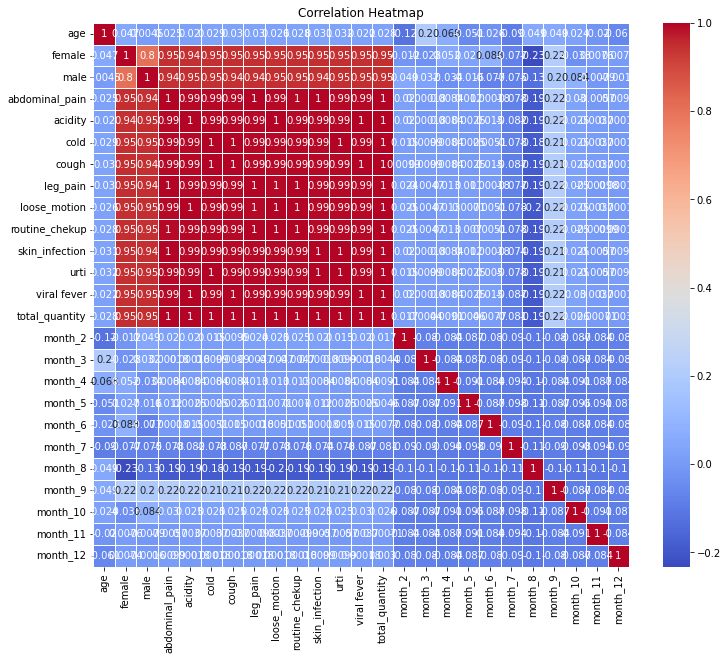

In [53]:
# Exclude non-numeric columns
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

# Create a correlation matrix for numeric columns
correlation_matrix = df_clean[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

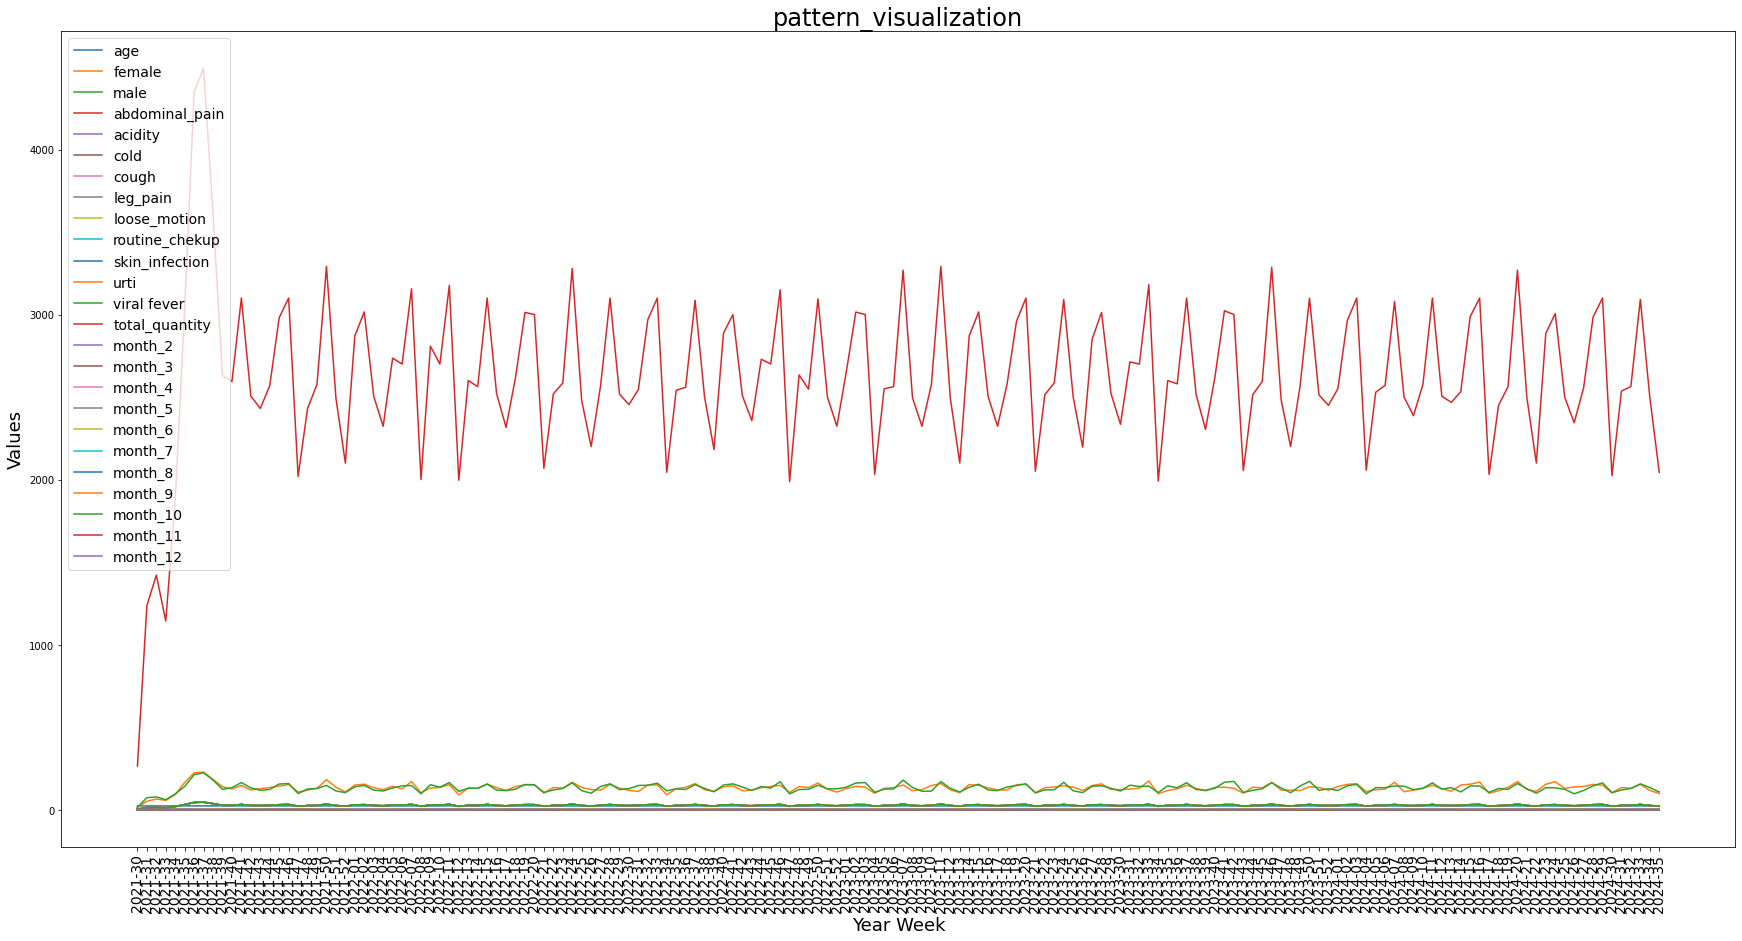

In [54]:
import matplotlib.pyplot as plt

# Assuming df_clean already contains the data you want to plot

## Set the size of the plot
plt.figure(figsize=(30, 15))

# Plot each feature separately
for column in df_clean.columns:
    if column != 'year_week':
        plt.plot(df_clean['year_week'], df_clean[column], label=column)

# Customize the plot as needed
plt.title('pattern_visualization', fontsize=24)  # Adjust the fontsize as needed
plt.xlabel('Year Week', fontsize=18)  # Adjust the fontsize as needed
plt.ylabel('Values', fontsize=18)  # Adjust the fontsize as needed

# Add a legend to the plot
plt.legend(fontsize=14)  # Adjust the fontsize as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)  # Adjust the fontsize as needed

# Increase the size of each title on the plot
plt.rc('axes', titlesize=24)  # Adjust the fontsize as needed

# Show the plot
plt.show()

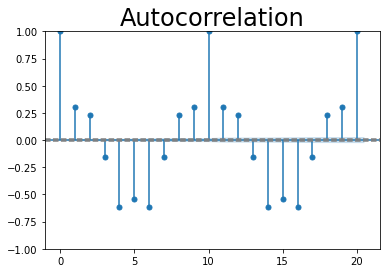

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming your data is stored in a DataFrame called df
# Replace 'your_dataframe' with the actual name of your DataFrame
your_dataframe = df

# Create ACF plot
acf_plot = plot_acf(your_dataframe['total_quantity'], lags=20)

# Get the current axes of the figure
axes = acf_plot.gca()

# Add confidence intervals
axes.axhline(y=0, linestyle='--', color='gray')
axes.axhline(y=-1.96/np.sqrt(len(your_dataframe)), linestyle='--', color='gray')
axes.axhline(y=1.96/np.sqrt(len(your_dataframe)), linestyle='--', color='gray')

# Show the plot
plt.show()


In [56]:
# !pip install pmdarima

In [57]:
# !pip install statistics

In [58]:
# !pip install pydlm

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pydlm import dlm, trend, seasonality
import numpy as np
import statistics
import pandas as pd

# univariate_forecast
1. moving average
2. Holt Winters
3. holt linear
4. ARIMA

In [60]:
def run_fcast(ser,model,h,period):
    
    if model == "arima":
        print("Running Arima.........")
#         stepwise_model_arima = auto_arima(ser, start_p=0, start_q=0,max_p=2, max_q=2, m=period,seasonal=False,max_d=1,
#                            trace=False,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
#         fcast = np.round(stepwise_model_arima.predict(n_periods=h)).astype(int)
        fcast = []
        history = ser.tolist()
        for i in range(0,h):
            model = ARIMA(history, order = (5,0,4))
            model_fit = model.fit()
            out = model_fit.forecast()
            yhat = out[0]
            fcast.append(yhat)
            history.append(yhat)
        return fcast;

    elif model == "ma":
        print("Running Moving Average...........")
        fcast_12 = float(ser.rolling(26).mean().iloc[-1])
        fcast_8 = float(ser.rolling(13).mean().iloc[-1])
        fcast_4 = float(ser.rolling(5).mean().iloc[-1])
        fcast_1 = float(ser.rolling(1).mean().iloc[-1])
        fcast = np.round([statistics.mean([fcast_12,fcast_8,fcast_4,fcast_1])]*h).astype(int)
        fcast[fcast<0] = 0
        return fcast;
    
    elif model == "simexp":
        print("Running Simple Exp..............")
        fcast = np.round(SimpleExpSmoothing(np.asarray(ser)).fit(smoothing_level=0.5,optimized=False).forecast(h)).astype(int)
        fcast[fcast<0] = 0
        return fcast;
    
    elif model == "holtlinear":
        print("Running Holt Linear............")
        fcast = np.round(Holt(ser).fit(smoothing_level = 0.3,smoothing_slope = 0.1).forecast(h)).astype(int)
        fcast[fcast<0] = 0
        return fcast;
    
    elif model == "holtwinter":
        print("Running Holt Winters...........")
        fcast = np.round(ExponentialSmoothing(ser ,seasonal_periods=52 ,trend='add', 
                                seasonal='add').fit(optimized = True).forecast(h)).astype(int)
        fcast[fcast<0] = 0
        return fcast;

    else:
            fcast = np.repeat(np.nan,h)
            return fcast;


In [61]:
def univariate_forecast(data, uni_model, test_set):
    
    serie = data['total_quantity']
    
    predictions = test_set[['year_week','total_quantity']]
    predictions['Predicted'] = run_fcast(serie, uni_model, test_set.shape[0], 52 )
    
    return(predictions)

In [62]:
train = df_clean[:-13]
test = df_clean[-13:]

In [63]:
arima_fcast=univariate_forecast(train,'arima',test)
arima_fcast

Running Arima.........


C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarni

,year_week,total_quantity,Predicted
149,2024-23,2886,2515.160967
150,2024-24,3006,2928.539606
151,2024-25,2500,2639.545482
152,2024-26,2344,2229.638764
153,2024-27,2556,2503.625467
154,2024-28,2985,2930.529543
155,2024-29,3100,2945.116324
156,2024-30,2023,2317.640260
157,2024-31,2536,2394.437882
158,2024-32,2564,2927.037659


In [64]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df_clean['total_quantity'], autolag='AIC')

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Interpret the results
if adf_result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -7.673963682440713
p-value: 1.5666522937096034e-11
Critical Values: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}
The time series is likely stationary.


In [65]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Assuming 'df_clean' has a datetime index and a column named 'total_quantity'
# Replace 'total_quantity' with the actual column name in your dataset
# If your data is not in time series format, you may need to create a time series first.

# Example:
# df_clean['date'] = pd.to_datetime(df_clean['date'])
# df_clean = df_clean.set_index('date')

# Define the range of orders for p, d, and q
p_values = range(0, 6)  # Replace with a suitable range
d_values = range(0, 2)  # Replace with a suitable range
q_values = range(0, 5)  # Replace with a suitable range

# Generate all possible combinations of p, d, and q
orders = list(product(p_values, d_values, q_values))

# Initialize variables for storing results
best_order_aic = None
best_aic = float('inf')  # Set to positive infinity initially

best_order_bic = None
best_bic = float('inf')  # Set to positive infinity initially

# Loop through each combination of orders
for order in orders:
    try:
        model = ARIMA(df_clean['total_quantity'], order=order)
        result = model.fit()

        # Calculate AIC and BIC
        aic = result.aic
        bic = result.bic

        # Update best AIC order if current AIC is lower
        if aic < best_aic:
            best_aic = aic
            best_order_aic = order

        # Update best BIC order if current BIC is lower
        if bic < best_bic:
            best_bic = bic
            best_order_bic = order

    except Exception as e:
        continue  # Skip orders that result in convergence issues

# Print the best orders and corresponding AIC and BIC
print("Best Order (AIC):", best_order_aic)
print("Best AIC:", best_aic)

print("Best Order (BIC):", best_order_bic)
print("Best BIC:", best_bic)


C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarni

Best Order (AIC): (4, 1, 2)
Best AIC: 2346.721806734685
Best Order (BIC): (3, 1, 2)
Best BIC: 2366.4230982174195


C:\Users\GHAGHRE\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


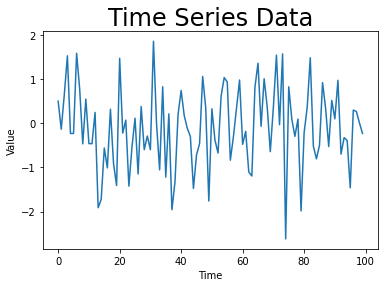

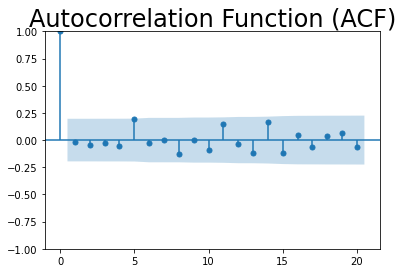

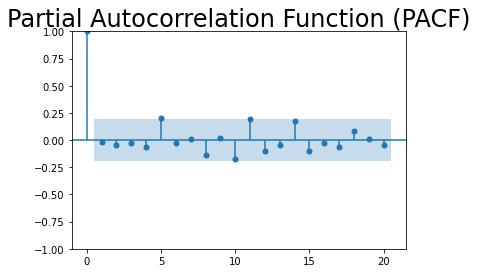

In [66]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'your_data' is your time series data, replace it with your actual data
# Example: your_data = pd.read_csv('your_data.csv')['column_name']
# Generate a sample time series if you don't have one
np.random.seed(42)
df_clean= np.random.randn(100)

# Plot the time series
plt.plot(df_clean)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Calculate ACF and PACF
lag_acf = acf(df_clean, nlags=20)
lag_pacf = pacf(df_clean, nlags=20, method='ols')

# Plot ACF
plot_acf(df_clean, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(df_clean, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


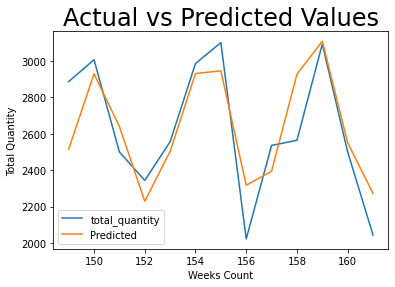

In [67]:
arima_fcast.plot(legend=True)
# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Weeks Count')
plt.ylabel('Total Quantity')
plt.legend()

# Show the plot
plt.show()

In [68]:
arima_fcast_mse = mean_squared_error(arima_fcast['total_quantity'], arima_fcast['Predicted'])
arima_fcast_mape = mean_absolute_percentage_error(arima_fcast['total_quantity'], arima_fcast['Predicted'])*100
arima_fcast_rmse = sqrt(arima_fcast_mse)
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [arima_fcast_mse,arima_fcast_rmse,arima_fcast_mape]
})

# Display the table
print(metrics_table)

                                  Metric         Value
0               Mean Squared Error (MSE)  38386.969018
1         Root Mean Squared Error (RMSE)    195.925927
2  Mean Absolute Percentage Error (MAPE)      6.363061


In [69]:
ma_fcast = univariate_forecast(train, 'ma', test)
ma_fcast

Running Moving Average...........


,year_week,total_quantity,Predicted
149,2024-23,2886,2485
150,2024-24,3006,2485
151,2024-25,2500,2485
152,2024-26,2344,2485
153,2024-27,2556,2485
154,2024-28,2985,2485
155,2024-29,3100,2485
156,2024-30,2023,2485
157,2024-31,2536,2485
158,2024-32,2564,2485


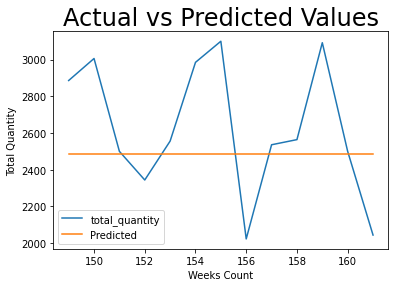

In [70]:
ma_fcast.plot(legend=True)
# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Weeks Count')
plt.ylabel('Total Quantity')
plt.legend()

# Show the plot
plt.show()

In [71]:
ma_fcast_mse = mean_squared_error(ma_fcast['total_quantity'], ma_fcast['Predicted'])
ma_fcast_rmse = sqrt(ma_fcast_mse)
ma_fcast_mape = mean_absolute_percentage_error(ma_fcast['total_quantity'], ma_fcast['Predicted'])*100
# Create a DataFrame to store the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [ma_fcast_mse, ma_fcast_rmse, ma_fcast_mape]
})

# Display the table
print(metrics_table)

                                  Metric          Value
0               Mean Squared Error (MSE)  143927.307692
1         Root Mean Squared Error (RMSE)     379.377527
2  Mean Absolute Percentage Error (MAPE)      11.303470


In [72]:
simexp_fcast=univariate_forecast(train, 'simexp', test)
simexp_fcast

Running Simple Exp..............


,year_week,total_quantity,Predicted
149,2024-23,2886,2397
150,2024-24,3006,2397
151,2024-25,2500,2397
152,2024-26,2344,2397
153,2024-27,2556,2397
154,2024-28,2985,2397
155,2024-29,3100,2397
156,2024-30,2023,2397
157,2024-31,2536,2397
158,2024-32,2564,2397


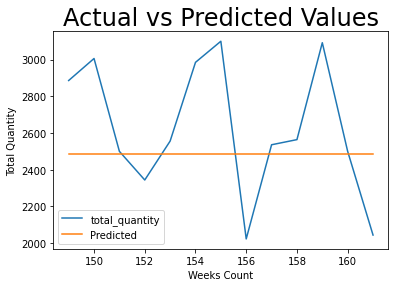

In [73]:
ma_fcast.plot(legend=True)
# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Weeks Count')
plt.ylabel('Total Quantity')
plt.legend()

# Show the plot
plt.show()

In [74]:
simexp_fcast_mse = mean_squared_error(simexp_fcast['total_quantity'], ma_fcast['Predicted'])
simexp_fcast_rmse = sqrt(simexp_fcast_mse)
simexp_fcast_mape = mean_absolute_percentage_error(simexp_fcast['total_quantity'], simexp_fcast['Predicted'])*100
# Create a DataFrame to store the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [ma_fcast_mse, ma_fcast_rmse, ma_fcast_mape]
})

# Display the table
print(metrics_table)

                                  Metric          Value
0               Mean Squared Error (MSE)  143927.307692
1         Root Mean Squared Error (RMSE)     379.377527
2  Mean Absolute Percentage Error (MAPE)      11.303470


In [75]:
hw_fcast = univariate_forecast(train, 'holtwinter', test)
hw_fcast

Running Holt Winters...........


,year_week,total_quantity,Predicted
149,2024-23,2886,2415
150,2024-24,3006,3013
151,2024-25,2500,2306
152,2024-26,2344,1990
153,2024-27,2556,2467
154,2024-28,2985,2771
155,2024-29,3100,2174
156,2024-30,2023,1721
157,2024-31,2536,2168
158,2024-32,2564,2357


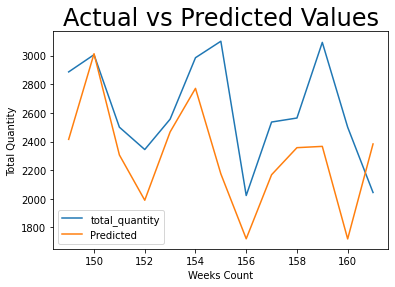

In [76]:
hw_fcast.plot(legend=True)
# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Weeks Count')
plt.ylabel('Total Quantity')
plt.legend()

# Show the plot
plt.show()

In [77]:
hw_fcast_mse = mean_squared_error(hw_fcast['total_quantity'], hw_fcast['Predicted'])
hw_fcast_rmse = sqrt(hw_fcast_mse)
hw_fcast_mape = mean_absolute_percentage_error(hw_fcast['total_quantity'], hw_fcast['Predicted'])*100
# Create a DataFrame to store the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [hw_fcast_mse, hw_fcast_rmse, hw_fcast_mape]
})

# Display the table
print(metrics_table)

                                  Metric          Value
0               Mean Squared Error (MSE)  216608.384615
1         Root Mean Squared Error (RMSE)     465.412059
2  Mean Absolute Percentage Error (MAPE)      14.516564


In [78]:
hl_fcast = univariate_forecast(train, 'holtlinear', test)
hl_fcast

Running Holt Linear............


,year_week,total_quantity,Predicted
149,2024-23,2886,2500
150,2024-24,3006,2487
151,2024-25,2500,2473
152,2024-26,2344,2459
153,2024-27,2556,2446
154,2024-28,2985,2432
155,2024-29,3100,2419
156,2024-30,2023,2405
157,2024-31,2536,2391
158,2024-32,2564,2378


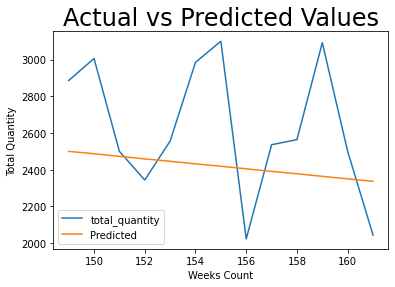

In [79]:
hl_fcast.plot(legend=True)
# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Weeks Count')
plt.ylabel('Total Quantity')
plt.legend()

# Show the plot
plt.show()

In [80]:
hl_fcast_mse = mean_squared_error(hl_fcast['total_quantity'], hl_fcast['Predicted'])
hl_fcast_rmse = sqrt(hl_fcast_mse)
hl_fcast_mape = mean_absolute_percentage_error(hl_fcast['total_quantity'], hl_fcast['Predicted'])*100
# Create a DataFrame to store the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Value': [hl_fcast_mse, hl_fcast_rmse, hl_fcast_mape]
})

# Display the table
print(metrics_table)

                                  Metric          Value
0               Mean Squared Error (MSE)  157989.153846
1         Root Mean Squared Error (RMSE)     397.478495
2  Mean Absolute Percentage Error (MAPE)      12.089069


In [81]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

def random_forest(x_train, y_train, x_test):
                       
    rf = RandomForestRegressor(bootstrap=True, criterion='mse',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease = 0.0, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)   
    return(y_pred)

def xgb(x_train, y_train, x_test):
                
    xgb_reg = XGBRegressor()    
    xgb_reg.fit(x_train, y_train)
    y_pred = xgb_reg.predict(x_test)
    return(y_pred)

def multivariate_forecast(model, train, test):
    
    x_train = train.drop(['year_week', 'total_quantity'], axis = 1)
    y_train = train[['total_quantity']]
    x_test = test.drop(['year_week', 'total_quantity'], axis = 1)
    
    predictions = test[['year_week','total_quantity']]
    if model == 'xgb':
        predictions['Predicted'] = xgb(x_train, y_train, x_test)\
        
    if model == 'rf':
        predictions['Predicted'] = random_forest(x_train, y_train, x_test)
    
    return(predictions)


In [82]:
xgb_fcast = multivariate_forecast('xgb', train, test)
xgb_fcast

,year_week,total_quantity,Predicted
149,2024-23,2886,2879.447754
150,2024-24,3006,3018.067627
151,2024-25,2500,2494.624023
152,2024-26,2344,2350.362549
153,2024-27,2556,2537.879150
154,2024-28,2985,2990.045898
155,2024-29,3100,3094.886719
156,2024-30,2023,2032.018188
157,2024-31,2536,2543.765625
158,2024-32,2564,2550.279297


In [83]:
xgb_fcast_mse = mean_squared_error(xgb_fcast['total_quantity'], xgb_fcast['Predicted'])
xgb_fcast_mape = mean_absolute_percentage_error(xgb_fcast['total_quantity'], xgb_fcast['Predicted'])*100
print(xgb_fcast_mse, xgb_fcast_mape)

91.34410253167152 0.33284714114699804


In [84]:
rf_fcast = multivariate_forecast('rf', train, test)
rf_fcast

,year_week,total_quantity,Predicted
149,2024-23,2886,2864.662991
150,2024-24,3006,3002.339846
151,2024-25,2500,2513.712530
152,2024-26,2344,2354.678968
153,2024-27,2556,2528.737250
154,2024-28,2985,2963.246226
155,2024-29,3100,3098.953198
156,2024-30,2023,2039.081413
157,2024-31,2536,2557.389140
158,2024-32,2564,2533.054606


In [85]:
rf_fcast_mse = mean_squared_error(rf_fcast['total_quantity'], rf_fcast['Predicted'])
rf_fcast_mape = mean_absolute_percentage_error(rf_fcast['total_quantity'], rf_fcast['Predicted'])*100
print(rf_fcast_mse, rf_fcast_mape)

296.7720938601776 0.564313883770484


In [86]:
pwd

'C:\\Users\\GHAGHRE\\Desktop'